## Project Objective and Overview

Develop a way to predict if loan with default. Dataset is xlsx with two tabs.

### Structure
1. Data Exploration
2. Feature Engineering
3. Preprocessing
4. Machine Learning | Training
5. Insights

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, partial_dependence
from sklearn.metrics import roc_curve, auc
from sklearn import tree
import graphviz

%matplotlib inline

In [2]:
df = pd.read_excel("credit_defaults (4).xlsx", header=1)
info = pd.read_excel("credit_defaults (4).xlsx", sheetname=1, header=None)

## 1. Data Exploration

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#rename columns for ease of use
df.rename(columns={"default payment next month":"is_default"}, inplace=True)
df.columns = map(str.lower, df.columns)
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'is_default'],
      dtype='object')

In [5]:
#check what's in the info tab. Hmm so this data is from Taiwan!
info.style.set_table_styles([{"selector": "td", "props": [("max-width", "750px")]}])

,0
0,"Y: Default 1 - yes, 0 - no"
1,X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
2,X2: Gender (1 = male; 2 = female).
3,X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
4,X4: Marital status (1 = married; 2 = single; 3 = others).
5,X5: Age (year).
6,"X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above."
7,"X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005."
8,"X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005."


In [6]:
len(df)

30000

In [7]:
#check that all ids are unique
df.id.nunique()

30000

In [8]:
df.describe(include="all")

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,is_default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
#for some reason there are education values higher than the info tab specifies.
#I'm not sure if this is a problem, but I'll leave it for now. It's about 1% of the dataset.
# worst case I can coalesce all 5's and 6's into 4's.
print(len(df[df.education > 4]))
df[df.education > 4].head()

331


,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,is_default
47,48,150000,2,5,2,46,0,0,-1,0,...,1170,0,0,1013,1170,0,0,0,0,1
69,70,20000,1,5,2,22,2,0,0,0,...,18085,11205,5982,0,1200,1000,500,1000,0,0
385,386,410000,2,5,1,42,0,0,0,0,...,240865,234939,240176,15000,14000,9000,8500,9000,8300,0
502,503,230000,2,6,2,46,0,0,0,0,...,186635,189896,193351,10000,9000,8000,8000,7500,7000,0
504,505,30000,1,6,1,53,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#check for NaN's
df.isnull().sum()

id            0
limit_bal     0
sex           0
education     0
marriage      0
age           0
pay_0         0
pay_2         0
pay_3         0
pay_4         0
pay_5         0
pay_6         0
bill_amt1     0
bill_amt2     0
bill_amt3     0
bill_amt4     0
bill_amt5     0
bill_amt6     0
pay_amt1      0
pay_amt2      0
pay_amt3      0
pay_amt4      0
pay_amt5      0
pay_amt6      0
is_default    0
dtype: int64

## 2. Feature Engineering

Ok so after looking at the data, everything is pretty clean and no missing values. The only slightly weird thing was the education values.

Looking at the dataset, I can see that the biggest challenge in predicting defaults will be feature engineering the pay/bill/pay_amt features. The other thing will be ecoding some of the categorical variables in one-hot-encoded form for ML training.

In [11]:
#let's look at some of the past payment data
#Also need to rename a column for consistency
df.rename(columns={"pay_0":"pay_1"}, inplace=True)
df.pay_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_1, dtype: int64

Those -2's should not be there. They are most likely either a -1 or a 2 inputted improperly. I'll see if I can find out

In [12]:
df[df.pay_1 == -2].pay_2.value_counts()

-2    2561
-1     193
 2       5
Name: pay_2, dtype: int64

In [13]:
df[df.pay_2 == -2].pay_3.value_counts()

-2    3377
-1     401
 2       3
 0       1
Name: pay_3, dtype: int64

It seems like the -2's are most likely to be -1's, so I'll fix that. The 0's in pay status seem to mean the customer paid the minimum bill amount that month.

In [14]:
df.iloc[:, 6:12].replace(-2, -1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
#plot some more data to understand how this payment amount works
pd.set_option('display.max_columns', None)
df[df.pay_2 == 0].head(30)

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,is_default
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,11,200000,2,3,2,34,0,0,2,0,0,-1,11073,9787,5535,2513,1828,3731,2306,12,50,300,3738,66,0
12,13,630000,2,2,2,41,-1,0,-1,-1,-1,-1,12137,6500,6500,6500,6500,2870,1000,6500,6500,6500,2870,0,0
14,15,250000,1,1,2,29,0,0,0,0,0,0,70887,67060,63561,59696,56875,55512,3000,3000,3000,3000,3000,3000,0
16,17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1


Now I'll generate a few "summary" features for those pay/bill columns. A few ideas are:
* avg of pay_x columns. This should serve as an overall index of how good the customer was at paying their bill
* trend in balance (bill_amt6 - bill_amt1). Is the customer's balance decreasing or increasing over time
* average of ratio of pay_amt : bill_amt. How much is the customer paying in relation to their bill

In [16]:
df['avg_pay'] = df.iloc[:, 6:12].mean(axis=1)
df['balance_trend'] = df.bill_amt6 - df.bill_amt1
df['pay_bill_ratio'] = (df.pay_amt1 / df.bill_amt2 + df.pay_amt2 / df.bill_amt3 +
                        df.pay_amt3 / df.bill_amt4 + df.pay_amt4 / df.bill_amt5 +
                        df.pay_amt5 / df.bill_amt6) / 5
#balance of zero will lead to NaN, inf, so replace with 1 (payment zero, balance zero, so fully paid)
#also replace negatives
df.pay_bill_ratio.fillna(1, inplace=True)
df.pay_bill_ratio.replace(np.inf, 1, inplace=True)
df.pay_bill_ratio[df.pay_bill_ratio < 0] = 1
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,is_default,avg_pay,balance_trend,pay_bill_ratio
0,1,20000,2,2,1,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.000000,-3913,1.000000
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.500000,579,0.193583
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.000000,-13690,0.083968
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.000000,-17443,0.039794
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-0.333333,10514,0.471997


Now I'd like to summarize those 18 bill/pay columns. One way that might work is just take the average. 

In [17]:
df['avg_bill'] = df.iloc[:, 12:18].mean(axis=1)
df['avg_payamt'] = df.iloc[:, 18:24].mean(axis=1)

Another good way understand which data is impacting default is to look at the correlation plot:

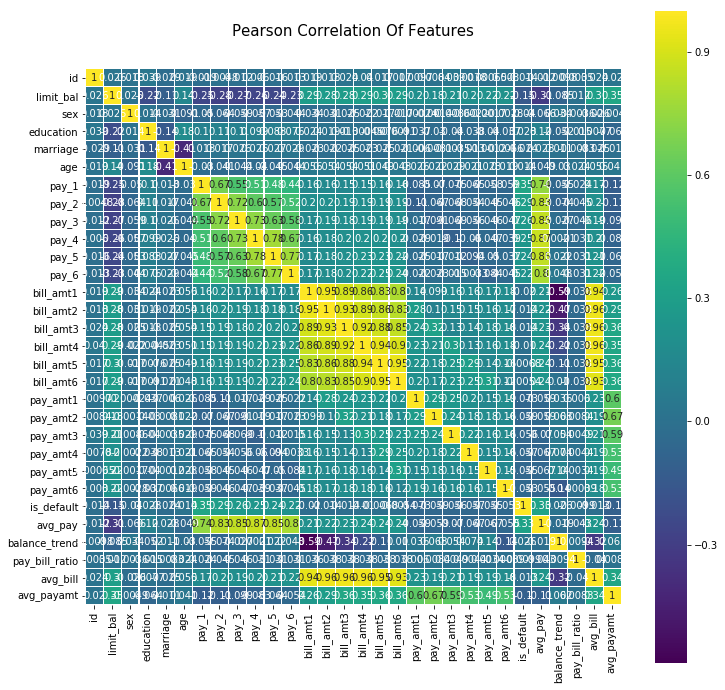

In [18]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Of Features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

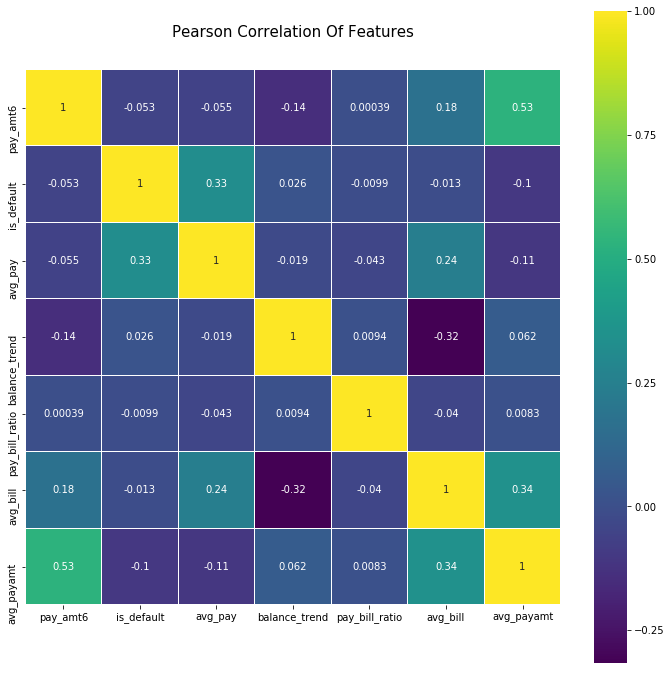

In [19]:
#close-up on engineered features
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:, -7:].corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Takeaway:
* High correlation wtih default: age, pay variables, limit_bal

## 3. Preprocessing

First I'll select features for the model. Based on the correlation matrix, I might expect some collinearity with the engineered features made from the "raw" features. I'll also create a list of all features for comparative performance.

In [20]:
columns = list(df)
features = columns[1:6] + columns[25:]
print(features, '\n')
features_all = columns[1:24] + columns[25:]
print(features_all, '\n')
target = columns[24]
print(target)

['limit_bal', 'sex', 'education', 'marriage', 'age', 'avg_pay', 'balance_trend', 'pay_bill_ratio', 'avg_bill', 'avg_payamt'] 

['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'avg_pay', 'balance_trend', 'pay_bill_ratio', 'avg_bill', 'avg_payamt'] 

is_default


I'll check the performance of the model using just the subset of features and compare to using all features

In [21]:
X = df[features]
#one hot encoding for categorical variables
X = pd.get_dummies(X, columns=['education', 'marriage'])
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

## 4. Machine Learning (Training)

I'll fit a Random Forest classifer for this exercise. I chose random forest because it is fairly quick to optimize and insensitive to outliers and irrelevant variables. In addition, it can be more robust to collinearity than other models.

Another model that would be worthwhile to try in this situation would be gradient boosting. Since performance is not the goal of this exercise, I won't do grid search/CV, but that would be a way to optimize performance. Features to grid search would include max_depth, max_features, min_samples_leaf, n_estimators

In [22]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=.001)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.001, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rf.score(Xtrain, ytrain)

0.82423809523809521

In [24]:
rf.score(Xtest, ytest)

0.80577777777777781

Now I'll re-do the analysis with all the features

In [25]:
X = df[features_all]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=.001)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.001, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
rf.score(Xtrain, ytrain)

0.83557142857142852

In [27]:
rf.score(Xtest, ytest)

0.82077777777777783

Ok the model seems to be doing better with all features.

In [28]:
1-ytrain.mean()

0.7777142857142857

The classes are a bit imbalanced, so just guessing all non-default gives accuracy of 78%. My random forest model is doing ~4-5% better, but we are really after AUC as a performance metric, so I will plot the ROC curve below.

In [29]:
y_score = rf.predict_proba(Xtest)[:,-1]
y_true = ytest
fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

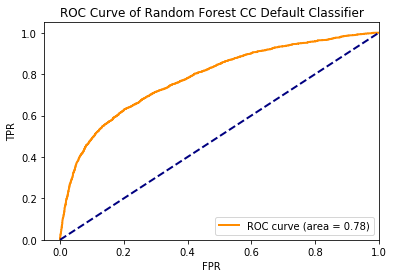

In [30]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Random Forest CC Default Classifier')
plt.legend(loc='lower right')
plt.show()

Takeaways:
* AUC is 0.78. Normally I would want to get closer to AUC of 0.9, but it was difficult to separate classes from this dataset. That may actually be fairly good performance for this case.
* Depending on the cost of false positives vs. false negatives, we can use the ROC curve to pick a cut-off point that would suit the needs of the business

## 5. Gaining Insights from the Model

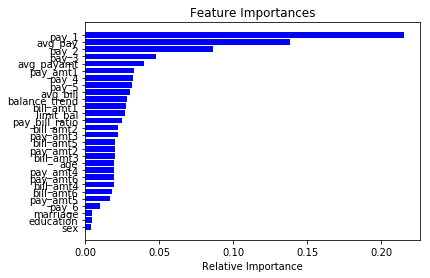

In [31]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

Takeaways:
* Because of the suspected collinearity, some of the features with redundant information may show up with lower feature importance.
* That said, the top features here do agree with the correlation plot from above.
* By far the most important features are the payment status features. Other top features include the limit_balance and average payment amount.

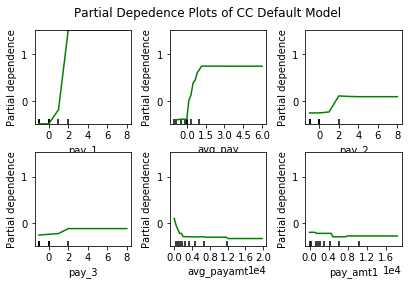

In [32]:
gb = GradientBoostingClassifier(n_estimators=50).fit(X,y)

indices_desc = indices[::-1]
features = indices_desc[:6]
feature_names = X.columns[features]

fig, axs = partial_dependence.plot_partial_dependence(gb, X, features,
                                                     feature_names=X.columns,
                                                     n_jobs=3, grid_resolution=50)
fig.suptitle('Partial Depedence Plots of CC Default Model')
plt.subplots_adjust(top=0.9)

The partial dependence plots offer a more detailed look at how the top features influence the model. Interestingly, if pay_1 shows a late payment > 2, the probability of a default rises sharply.

Lastly, I'll fit a simple tree to show how the splits look

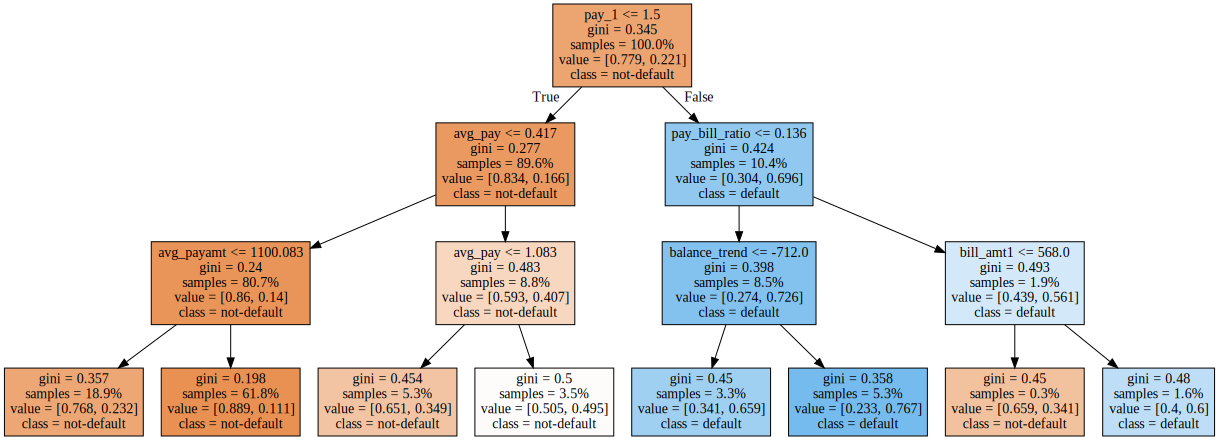

In [33]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['not-default', 'default'],
                     proportion=True, leaves_parallel=True, filled=True)
graphviz.Source(dot_data)

Takeaways:
* Indicators of not-default: Low late payment status and high payment amounts lead to highest probability leaf for non-defaulters.
* Indicators of default: High late payment status, low payment amount to bill ratio, and a growing balance trend lead to the highest probability leaf for defaulters